### Unsupervised Machine Learning -  Clustering using K-Means
- K-Means Clustering is an Unsupervised Machine Learning algorithm or an unsupervised machine learning techique that is suitable for working with unlablelled data thta lacks predefined categories or groups. The primary ojectves of this alogirthm is to group similar data points together, with the number of groups based on the features that are provided.

In [1]:
# Import Required Libraries 
#Data Analysis
import pandas as pd
import numpy as np

#Data Visuaization
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning and
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

#image but we are not using it for now
from IPython.display import Image

#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
data =pd.read_csv(r"C:\Users\TECHNOCRAT\Desktop\files\Data Scientist\15 Week Unsupervised Machine Learning\Customers.csv")
data.head(6)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

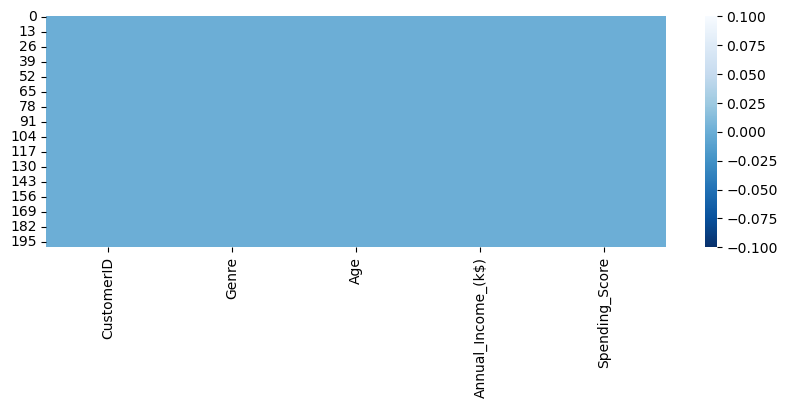

In [10]:
# check for missing values
print(data.isnull().sum())

# #visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

### Data Claening and Pre-Processing 

In [11]:
# check for duplicates 
print(data.duplicated().sum())

0


### Exploratory Data Analysis

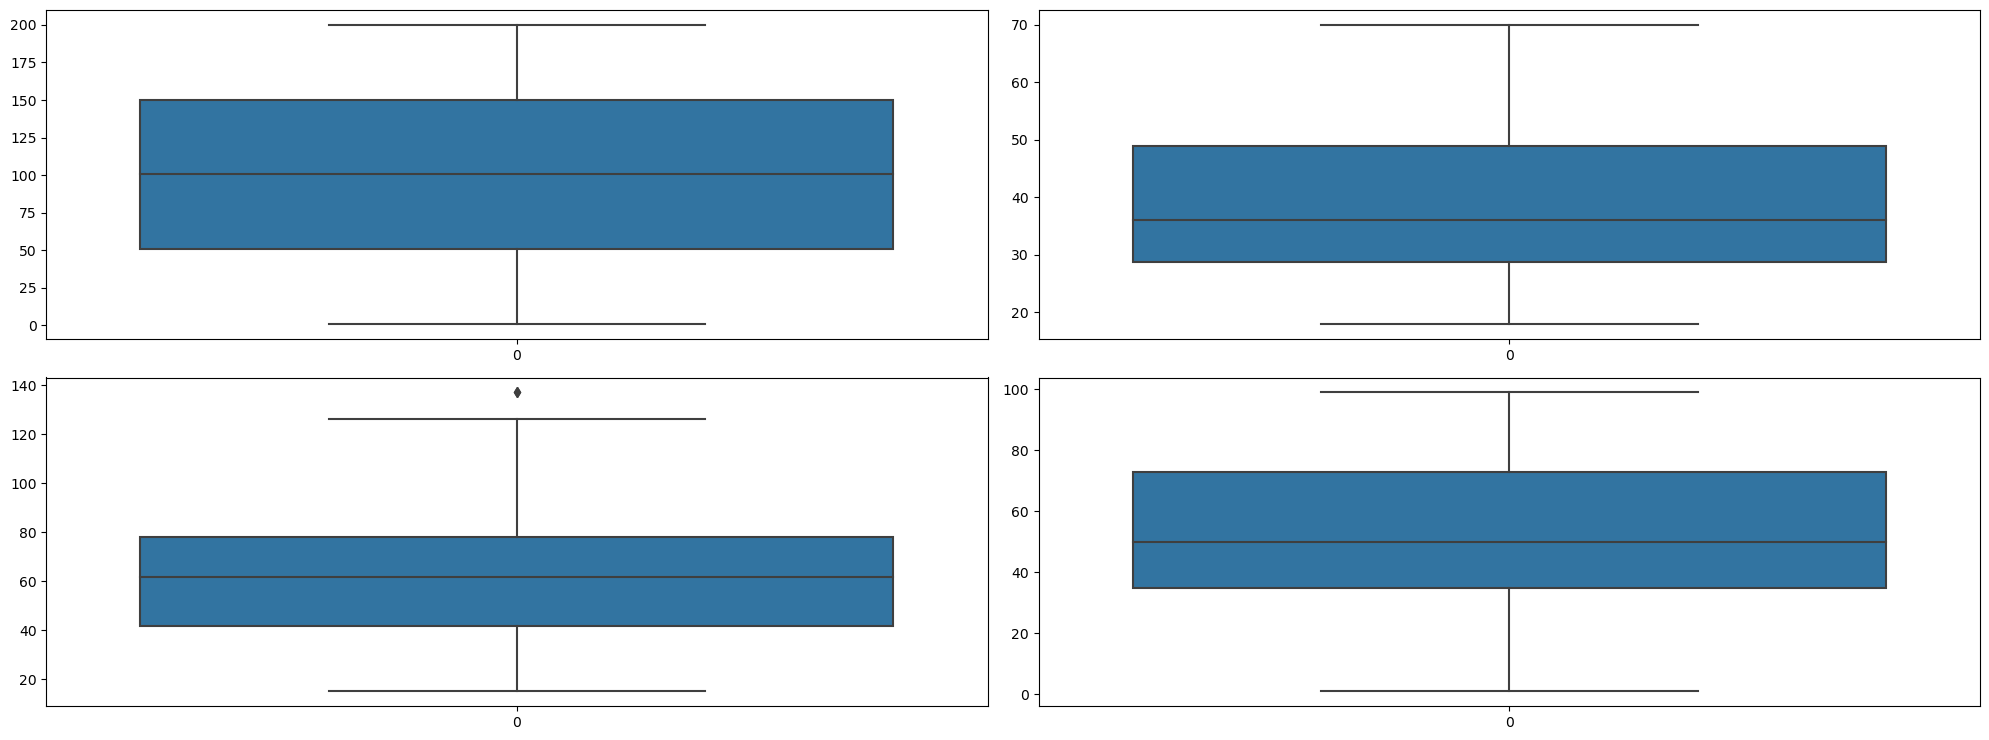

In [21]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.boxplot(data['CustomerID'], ax =axs [0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

### Exploratory Data Analysis
- Univariate
- Bivariate
- Multivariate

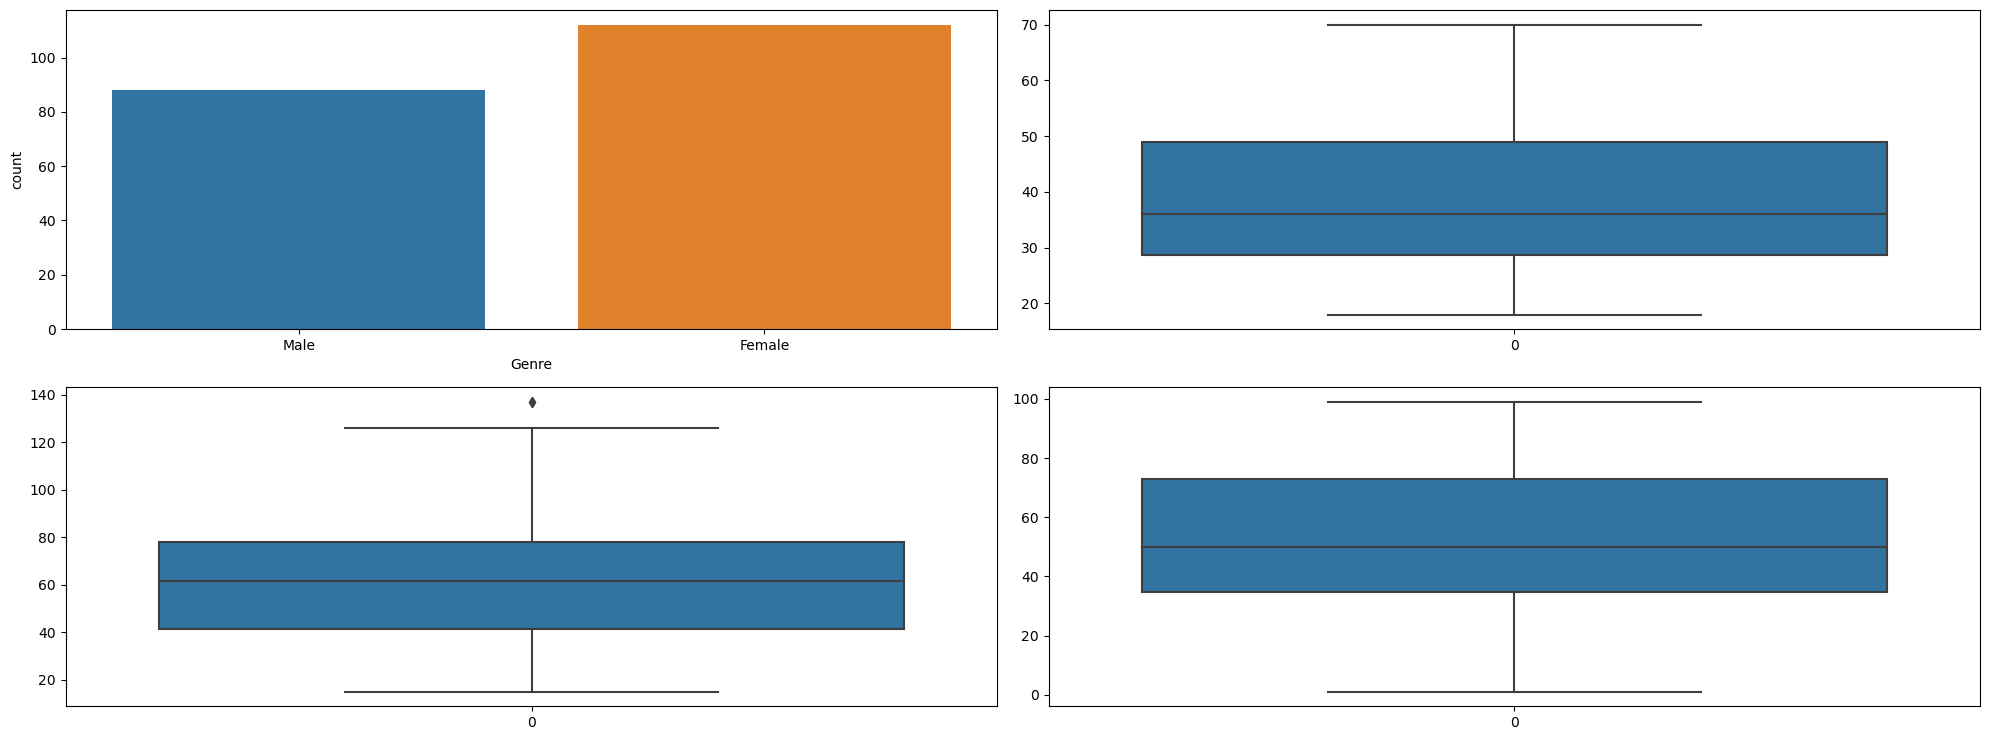

In [27]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(x=data['Genre'], ax =axs [0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

Narration explain your naration here

Lets build the model 

In [45]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding
encoder = LabelEncoder() # method initialization 

#Looping for columns except survived 
for c in data.columns[1:]:
    if(data[c].dtype =='object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]
            
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [46]:
data.columns[1:]

Index(['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [71]:
#Remove Customer ID
data.drop('CustomerID', axis=1, inplace=True)


In [50]:
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### The Elbow method  helps the machine to determine the accurate cluster to use

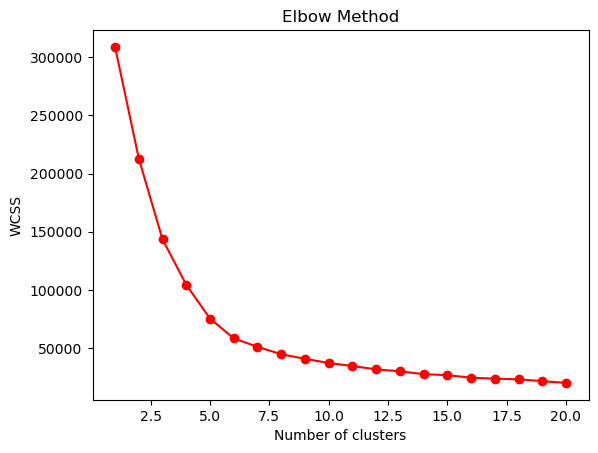

In [62]:
#Determine Optimal number if ckuster
WCSS = []
for i in range (1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1, 21), WCSS, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [69]:
# Fit k-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

# Add cluster labels to data
data['Cluster'] = kmeans.labels_

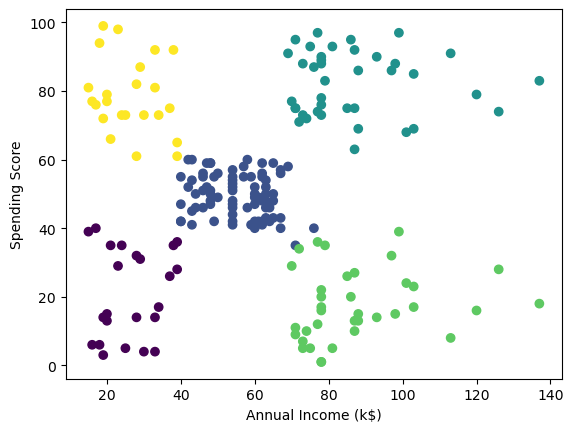

0.44473703994455477

In [70]:
#Visualize cluster results
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

#Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

In Conclusion
With the aid of Machine Learning, we've successfully divided customers into five segments according to their annual income and spending score. This segmentation will enable Selore's marketing department to effectively focus on the appropriate audience by utilizing the valuable insights I, as a skilled data scientist, have provided.